<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/logistic_regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

['setosa' 'versicolor' 'virginica']
(99, 2)


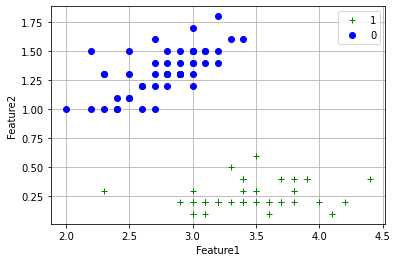

In [2]:
iris = load_iris()
x = iris.data[1:100,[1,3]]
y = iris.target[1:100]
print(iris.target_names)
print(x.shape)

plt.plot(x[y==0,0],x[y==0,1],'g+',label='1')
plt.plot(x[y==1,0],x[y==1,1],'bo',label='0')
plt.legend(loc='upper right')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.grid()
plt.show()


In [3]:
# implement logistic regression classified
class logistic_regression(object):
  def __init__(self, epochs = 100, eta = 0.1, random_state=1):
    self.epochs = epochs
    self.eta = eta
    self.random_state = random_state
  
  def fit(self, x,y):
    np.random.RandomState(self.random_state)
    self.w_ = np.random.normal(loc = 0.0, scale = 1.0, size = x.shape[1]+1)
    print(self.w_)
    self.cost_ = []
    for i in range(self.epochs):
      net = np.dot(x,self.w_[1:])+self.w_[0]
      #print(net)
      #print(net.shape)
      output = 1./(1.+np.exp(-net))
      #print(output)
      error = (y-output)
      #print(np.dot(x.T,error))
      #print(x.T.dot(error))
      self.w_[1:]+=self.eta*np.dot(x.T,error)
      self.w_[0]+=self.eta*error.sum()
      #print(y.shape)
      #print(output.shape)
      #print(np.log(output))
      cost = error.mean()#
      cost=-np.dot(y, np.log(output))-np.dot((1-y), np.log(1-output))
      self.cost_.append(cost)
    return(self)
  
  def predict(self, x):
    net = np.dot(x,self.w_[1:])+self.w_[0]
    output = 1./(1.+np.exp(-net))
    return(np.where(output>=0.5,1,0))




[ 2.79892964 -0.77915859 -2.07177645]
0


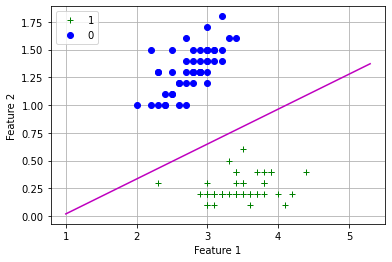

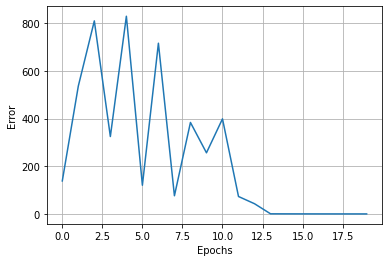

In [4]:
model = logistic_regression(epochs=20, eta = 0.05)
model.fit(x,y)
y_pred = model.predict(x)
error=np.sum(np.abs(y-y_pred))
print(error)
# decision line
xx1 = np.arange(x[:,0].min()-1,x[:,0].max()+1,0.1)
xx2 = -(model.w_[1]*xx1+model.w_[0])/model.w_[2]

plt.plot(x[y_pred==0,0],x[y_pred==0,1],'g+',label='1')
plt.plot(x[y_pred==1,0],x[y_pred==1,1],'bo',label='0')
plt.legend(loc='upper left')
plt.plot(xx1, xx2, 'm-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

plt.plot(range(len(model.cost_)), model.cost_)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid()
plt.show()


['setosa' 'versicolor']
[[49  0]
 [ 0 50]]


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


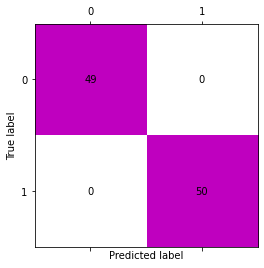

In [18]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['W', 'Y', 'M'])
# Compute confusion matrix
y_true = y
class_names = iris.target_names
print(class_names[0:-1])

#cnf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])  # 0 = 'setosa', 1 = 'versicolor'
cm = confusion_matrix(y, y_pred)  # y_true and y_pred - 0 = 'setosa', 1 = 'versicolor'
print(cm)

plt.figure()
plt.matshow(cm, cmap=cmap)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [7]:
import mlxtend
                                                          
print(mlxtend.__version__) 

!pip install mlxtend --upgrade --no-deps

print(mlxtend.__version__) 

0.17.3
Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.17.3)
0.17.3
